<a href="https://colab.research.google.com/github/markpoxley/EELS-Autoencoders/blob/main/EELS_Autoencoder_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EELS Autoencoders Data Manipulation

### This note book demonstrates the steps required to put EELS data into the correct format for use with the auto encoder.

First import the rrequired libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

If running on a local machine gdown may have to be installed

In [ ]:
! pip install gdown
import gdown

### Load the simulated data set

In [ ]:
!gdown https://drive.google.com/uc?id=15axeMZpqWAWt5t_W6ccyx2ubXv_stqFh


Downloading...
From: https://drive.google.com/uc?id=15axeMZpqWAWt5t_W6ccyx2ubXv_stqFh
To: C:\Users\1oy\Documents\Work\Sergei\Autoencoders\for submission\uploads\revision1\Revision2\EELS data\for github\STO_Ototal_150A.txt

  0%|          | 0.00/1.63M [00:00<?, ?B/s]
 32%|###2      | 524k/1.63M [00:00<00:00, 3.60MB/s]
 96%|#########6| 1.57M/1.63M [00:00<00:00, 4.48MB/s]
100%|##########| 1.63M/1.63M [00:00<00:00, 6.64MB/s]


In [ ]:
sim0 = np.loadtxt('STO_Ototal_150A.txt')
sim0 = np.reshape(sim0,(67,39,39))

In [ ]:
sim0.shape

(67, 39, 39)

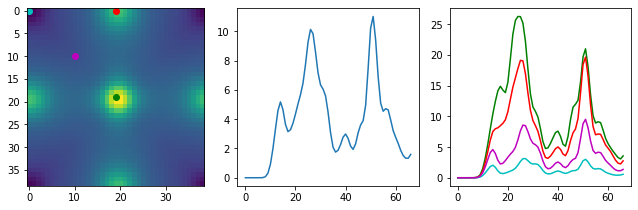

In [ ]:
SI = np.mean(sim0, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SI)
axs[1].plot(np.mean(sim0,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(sim0[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(sim0[:,19,0], color='r' )
axs[0].plot(0, 0, 'o', color='c')
axs[2].plot(sim0[:,0,0], color='c')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(sim0[:,10,10], color='m')


fig.tight_layout()
plt.show()

To work with 

In [ ]:
test = np.load('sim_crop.npy')
test.shape

(57, 39, 39)

We want each spectra to be divisible by 8 so we will cut the constant section at the fron anf the turnup at the tail.

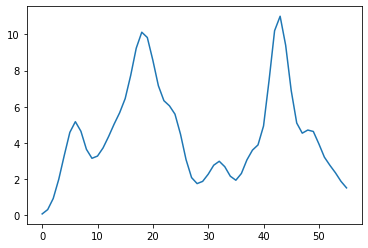

In [ ]:
sim_crop = np.zeros((52,39,39))
sim_crop = sim0[8:64,:,:]
plt.plot(np.mean(sim_crop,axis = (1,2)))

We normalize data between 0 and 1 before training, let's see haow that looks 

In [ ]:
norm = lambda x: (x - x.min()) / x.ptp()
imgdata = norm(sim_crop)

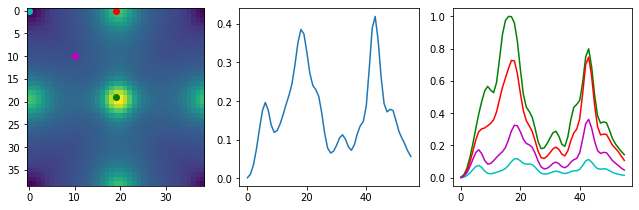

In [ ]:
SI = np.mean(imgdata, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SI)
axs[1].plot(np.mean(imgdata,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(imgdata[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(imgdata[:,19,0], color='r' )
axs[0].plot(0, 0, 'o', color='c')
axs[2].plot(imgdata[:,0,0], color='c')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(imgdata[:,10,10], color='m')


fig.tight_layout()
plt.show()

In [ ]:
np.save('sim_crop.npy',sim_crop)

#### Now let's add noise at various levels to the normalized data

In [ ]:
sigma = 0.1
imgdata_noisy = imgdata + np.random.normal(scale=sigma, size=imgdata.shape)
np.save('Noisy input('+str(sigma)+').npy',imgdata_noisy)

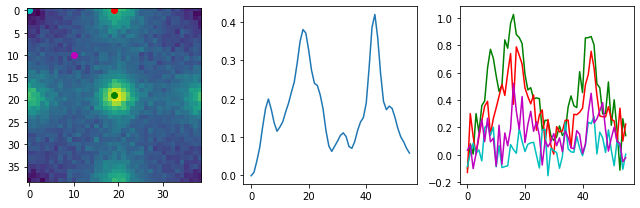

In [ ]:
SI = np.mean(imgdata_noisy, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SI)
axs[1].plot(np.mean(imgdata_noisy,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(imgdata_noisy[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(imgdata_noisy[:,19,0], color='r' )
axs[0].plot(0, 0, 'o', color='c')
axs[2].plot(imgdata_noisy[:,0,0], color='c')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(imgdata_noisy[:,10,10], color='m')


fig.tight_layout()
plt.show()

### Load the backgroung subtracted Experimental Fe L-shell

In [ ]:
!gdown https://drive.google.com/uc?id=1Ibzf8cbzhEbmftSkNlJbZxPBv2prQxtT
data_raw = np.loadtxt('Fe Signal SI.txt')
data_raw.shape

Downloading...
From: https://drive.google.com/uc?id=1Ibzf8cbzhEbmftSkNlJbZxPBv2prQxtT
To: C:\Users\1oy\Documents\Work\Sergei\Autoencoders\for submission\uploads\revision1\Revision2\EELS data\for github\Fe Signal SI.txt

0.00B [00:00, ?B/s]
524kB [00:00, 3.22MB/s]
1.57MB [00:00, 4.06MB/s]
3.15MB [00:00, 5.15MB/s]
4.24MB [00:00, 9.09MB/s]


(24300, 30)

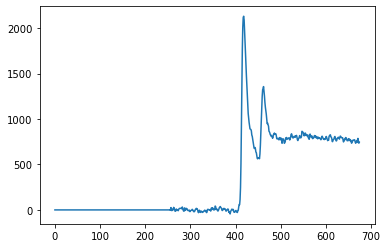

In [ ]:
exp = np.reshape(data_raw,(675,36,30))
# lets look at the mean
exp_mean = np.mean(exp, axis=(1,2))
plt.plot(exp_mean)

### Focus on the L-shell spectra: Note that the data set is chosen to have a length dvisible by 8

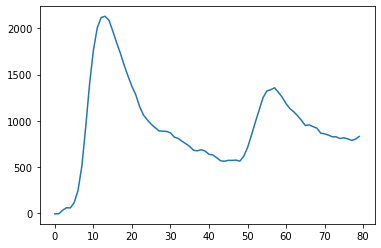

In [ ]:
exp_crop = np.zeros((80,36,30))
exp_crop = exp[405:485,:,:]
exp_mean = np.mean(exp_crop, axis=(1,2))
plt.plot(exp_mean)

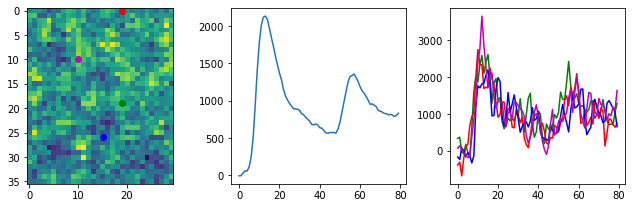

In [ ]:
SIexp = np.mean(exp_crop, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SIexp)
axs[1].plot(np.mean(exp_crop,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(exp_crop[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(exp_crop[:,19,0], color='r' )
axs[0].plot(15, 26, 'o', color='b')
axs[2].plot(exp_crop[:,0,0], color='b')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(exp_crop[:,10,10], color='m')


fig.tight_layout()
plt.show()

### Now examine the noise level
take the section of the experiment that is before the edge.

In [ ]:
spec_noise = np.zeros((100,36,30))
spec_noise = exp[300:400,:,:]


-2.0905680097747226 238.56491004293832


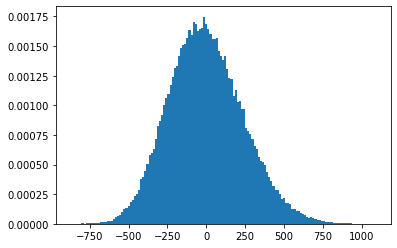

In [ ]:
spec_noise2 = np.reshape(spec_noise,(100*36*30))

from scipy.stats import norm
counts, bins = np.histogram(spec_noise2, bins = 'auto',density = True)

mean,std=norm.fit(spec_noise2)
print(mean,std)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### Interpolate simulation so spectra are the same size

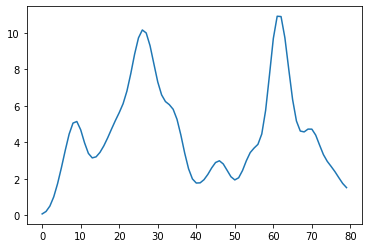

In [ ]:
sim_int = np.zeros((80,39,39))
from scipy.interpolate import interp1d
xold = np.linspace(start=0, stop=55, num=56)
xnew = np.linspace(start=0, stop=55, num=80)

temp = np.empty(80)

for i in range(39):
    for j in range(39):
        f2 = interp1d(xold, sim_crop[:,j,i], kind='cubic')
        sim_int[:,j,i] = f2(xnew)
        
plt.plot(np.mean(sim_int,axis = (1,2)))        

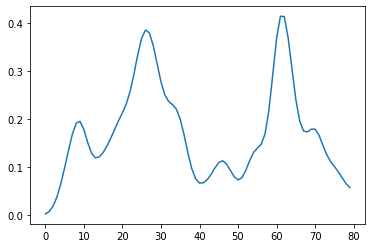

In [ ]:
sim_norm = norm(sim_int)
plt.plot(np.mean(sim_norm,axis = (1,2)))   

### Lets try and scale the experiemntal dataset to match the range in the normalized simulation 

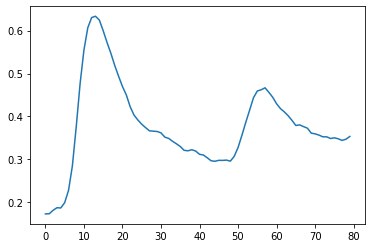

In [ ]:
test_exp = norm(exp_crop)
plt.plot(np.mean(test_exp,axis = (1,2)))  

### This has moved the beginning spectra away from zero.  Try something more sophisticated.
First get the experiment and simulation on similar ranges

In [ ]:
SIsim = np.mean(sim_int, axis = 0)
#check ranges in SIs
print('Experiment',np.amin(SIexp),np.amax(SIexp))
print('Simulation',np.amin(SIsim),np.amax(SIsim))


Experiment 554.8353653499998 1323.0600065
Simulation 1.388235664722695 11.18556623989538


In [ ]:
simrange = np.amax(SIsim) - np.amin(SIsim)
exprange = np.amax(SIexp) - np.amin(SIexp)

sim_norm = np.zeros((80,39,39))

for i in range(39):
    for j in range(39):
        temp = (SIsim[j,i] - np.amin(SIsim))/simrange
        
        factemp = exprange*temp + np.amin(SIexp)
        fac2 = factemp/SIsim[j,i]
        sim_norm[:,j,i] = sim_int[:,j,i]*fac2

        
SInorm = np.mean(sim_norm, axis = 0)        
print(np.amin(SInorm),np.amax(SInorm))

554.83536535 1323.0600065000003


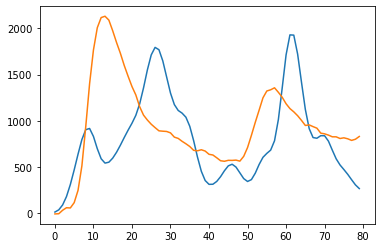

In [ ]:
plt.plot(np.mean(sim_norm,axis = (1,2))) 
plt.plot(np.mean(exp_crop,axis = (1,2))) 

#### Now renormalize the experiment and noise

In [ ]:
exp_norm = exp_crop/np.amax(sim_norm)
noise_norm = spec_noise2/np.amax(sim_norm)
# normalized experimental data
np.save('exp_norm_int',exp_norm )
# normalized simulated training set
np.save('sim_norm_int',sim_norm )


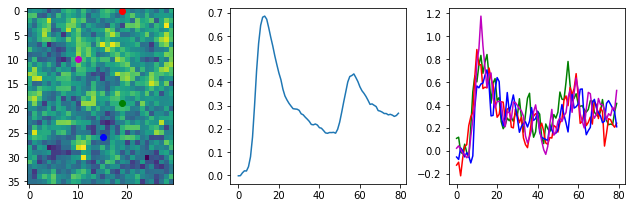

In [ ]:
SIexp = np.mean(exp_norm, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SIexp)
axs[1].plot(np.mean(exp_norm,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(exp_norm[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(exp_norm[:,19,0], color='r' )
axs[0].plot(15, 26, 'o', color='b')
axs[2].plot(exp_norm[:,0,0], color='b')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(exp_norm[:,10,10], color='m')


fig.tight_layout()
plt.show()

Finally estimate the appropriate noise level to ad to the training set

Mean -0.0006725387121753862 Standard Deviation 0.0767466720146569


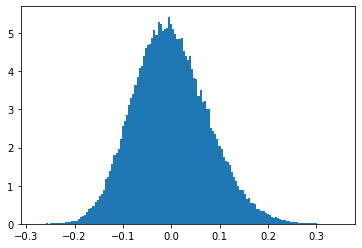

In [ ]:
spec_noise3 = np.reshape(noise_norm,(100*36*30))

from scipy.stats import norm
counts, bins = np.histogram(spec_noise3, bins = 'auto',density = True)

mean,std=norm.fit(spec_noise3)
print('Mean',mean,'Standard Deviation',std)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### It was shown in the paper that this training set does not work.  Let's add an additional step.

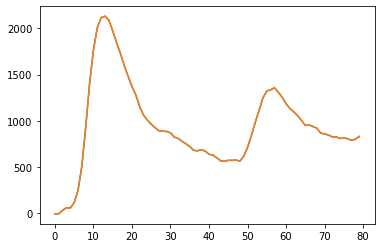

In [ ]:
fact = np.mean(exp_crop, axis=(1,2))/np.mean(sim_norm, axis=(1,2))

sim_fac2 = np.zeros((80,39,39))
for i in range(39):
    for j in range(39):
        sim_fac2[:,j,i] = sim_norm[:,j,i]*fact
plt.plot(exp_mean)    
plt.plot(np.mean(sim_fac2,axis = (1,2)))    

### The means match, let's check the ranges in the SIs

In [ ]:
SIexp = np.mean(exp_crop, axis = 0)  
SIsimfac2 = np.mean(sim_fac2, axis = 0)   
#check ranges in SIs
print('Experiment',np.amin(SIexp),np.amax(SIexp))
print('Simulation',np.amin(SIsimfac2),np.amax(SIsimfac2))

Experiment 554.8353653499998 1323.0600065
Simulation 636.0487566136668 1773.016975885685


### We could probably use this result, but for consistency with what is in the paper we will renormalize

In [ ]:
simrange = np.amax(SIsimfac2) - np.amin(SIsimfac2)
exprange = np.amax(SIexp) - np.amin(SIexp)

sim_norm_fac2 = np.zeros((80,39,39))

for i in range(39):
    for j in range(39):
        temp = (SIsimfac2[j,i] - np.amin(SIsimfac2))/simrange
        
        factemp = exprange*temp + np.amin(SIexp)
        fac2 = factemp/SIsimfac2[j,i]
        sim_norm_fac2[:,j,i] = sim_fac2[:,j,i]*fac2

        
SIsimfacnorm2 = np.mean(sim_norm_fac2, axis = 0)        
print(np.amin(SIsimfacnorm2),np.amax(SIsimfacnorm2))


554.8353653500001 1323.0600065000003


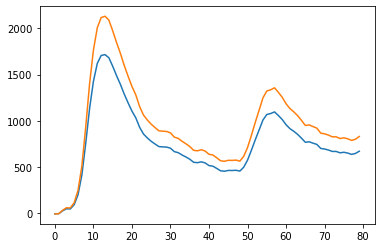

In [ ]:
plt.plot(np.mean(sim_norm_fac2,axis = (1,2))) 
plt.plot(np.mean(exp_crop,axis = (1,2))) 

In [ ]:
exp_norm = exp_crop/np.amax(sim_norm_fac2)
noise_norm = spec_noise2/np.amax(sim_norm_fac2)
# normalized experimental data
np.save('exp_norm_int_fac.npy',exp_norm )
# normalized simulated training set
np.save('sim_norm_int_fac.npy',sim_norm_fac2 )


Mean -0.0004054772860653262 Standard Deviation 0.046270990382682245


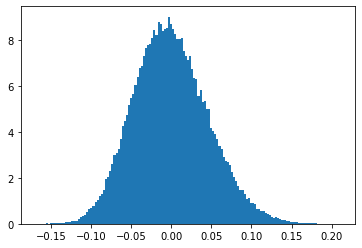

In [ ]:
spec_noise3 = np.reshape(noise_norm,(100*36*30))

from scipy.stats import norm
counts, bins = np.histogram(spec_noise3, bins = 'auto',density = True)

mean,std=norm.fit(spec_noise3)
print('Mean',mean,'Standard Deviation',std)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

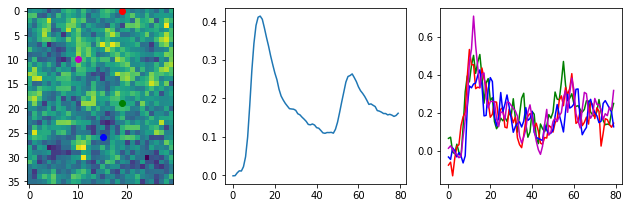

In [ ]:
SIexp = np.mean(exp_norm, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SIexp)
axs[1].plot(np.mean(exp_norm,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(exp_norm[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(exp_norm[:,19,0], color='r' )
axs[0].plot(15, 26, 'o', color='b')
axs[2].plot(exp_norm[:,0,0], color='b')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(exp_norm[:,10,10], color='m')


fig.tight_layout()
plt.show()

In [ ]:
test = np.load('exp_norm_fac.npy')

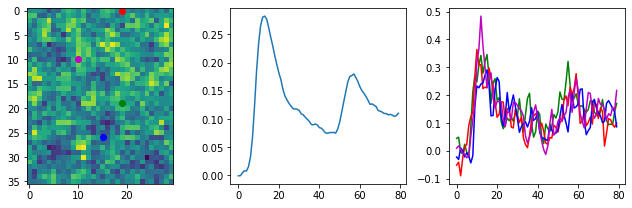

In [ ]:
SItest = np.mean(test, axis = 0)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=False)
axs[0].imshow(SItest)
axs[1].plot(np.mean(test,axis = (1,2)))
axs[0].plot(19, 19, 'o', color='g')
axs[2].plot(test[:,19,19], color='g')
axs[0].plot(19, 0, 'o', color='r')
axs[2].plot(test[:,19,0], color='r' )
axs[0].plot(15, 26, 'o', color='b')
axs[2].plot(test[:,0,0], color='b')
axs[0].plot(10, 10, 'o', color='m')
axs[2].plot(test[:,10,10], color='m')


fig.tight_layout()
plt.show()